In [1]:
import pandas as pd 
import numpy as np 

df = pd.read_csv("shieldSampleDatav4.csv")

from sklearn.cluster import KMeans
clusters = 3

kmeans = KMeans(n_clusters = clusters)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [2]:
kmeans.labels_

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [3]:
from sklearn.decomposition import PCA

pca = PCA(3)

pca.fit(df)

pca_data = pd.DataFrame(pca.transform(df))
pca_data.head()

,0,1,2
0,8.391467e+06,-18652.296049,183.166748
1,-2.923859e+05,228.394992,-1.794458
2,-2.923859e+05,228.394992,-1.794458
3,-2.923859e+05,228.394992,-1.794458
4,-2.923859e+05,228.394992,-1.794458


In [4]:
from matplotlib import colors as mcolors
import math

colors = list(zip(*sorted((tuple(mcolors.rgb_to_hsv(
	mcolors.to_rgba(color)[:3])),name)
	for name, color in dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS
		).items())))[1]

skips = math.floor(len(colors[3:-3])/clusters)
cluster_colors = colors[3:-3:skips]

In [5]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
   

fig = plt.figure() 
ax = fig.add_subplot(111, projection = '3d') 
ax.scatter(pca_data[0], pca_data[1], pca_data[2],  
           c = list(map(lambda label : cluster_colors[label], 
                                            kmeans.labels_))) 
   
str_labels = list(map(lambda label:'% s' % label, kmeans.labels_)) 
   
list(map(lambda data1, data2, data3, str_label: 
        ax.text(data1, data2, data3, s = str_label, size = 16.5, 
        zorder = 20, color = 'k'), pca_data[0], pca_data[1], 
        pca_data[2], str_labels)) 
   
plt.show()

<Figure size 640x480 with 1 Axes>

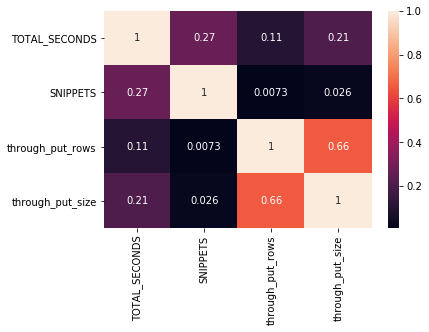

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns 
  
# generating correlation heatmap 
sns.heatmap(df.corr(), annot = True) 
  
# posting correlation heatmap to output console  
plt.show() 

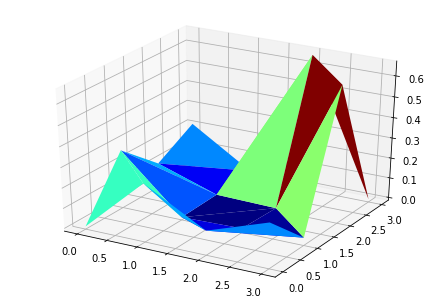

In [7]:
from matplotlib import cm 
  
# generating correlation data 
df = df.corr() 
df.index = range(0, len(df)) 
df.rename(columns = dict(zip(df.columns, df.index)), inplace = True) 
df = df.astype(object) 
  
''' Generating coordinates with  
corresponding correlation values '''
for i in range(0, len(df)): 
    for j in range(0, len(df)): 
        if i != j: 
            df.iloc[i, j] = (i, j, df.iloc[i, j]) 
        else : 
            df.iloc[i, j] = (i, j, 0) 
  
df_list = [] 
  
# flattening dataframe values 
for sub_list in df.values: 
    df_list.extend(sub_list) 
  
# converting list of tuples into trivariate dataframe 
plot_df = pd.DataFrame(df_list) 
  
fig = plt.figure() 
ax = Axes3D(fig) 
  
# plotting 3D trisurface plot 
ax.plot_trisurf(plot_df[0], plot_df[1], plot_df[2],  
                    cmap = cm.jet, linewidth = 0.2) 
  
plt.show() 